<span style="font-family: 'Times New Roman'; font-size: 18px;">


# K Means Clustering Project

## Introduction
Our goal is to apply KMeans Clustering to categorize universities into two distinct groups: Private and Public. Although we possess the labels for this dataset, they will be disregarded when applying the KMeans clustering algorithm, as it operates on an unsupervised learning basis. In this instance, we will utilize the labels to assess the algorithm's performance, although this is not typically done for KMeans. Therefore, the classification report and confusion matrix at the conclusion of this task are not applicable in a practical scenario!

This project aims to create a KMeans model that can determine if a college in the USA is classified as private or public, using a dataset that includes details about 777 institutions. Kindly be aware that while we possess labels for the information, we are choosing to overlook them.

## The Data
We are working with a data table that contains 777 observations and 18 variables.

* **Private**: Includes two components, Yes and No, which determine if the university operates as a public or private entity.
* **Apps**: The total count of applications submitted.
* **Accept**: The total count of applications accepted.
* **Enroll**: The proportion of new enrollees coming from the highest 25% of their high school graduating class.
* **Top10perc**: Percentage of incoming students who graduated in the top 10% of their high school class.
* **Top25perc**: Percentage of incoming students who ranked within the top 25 percent of their high school graduating class.
* **F.Undergr**: Total count of full-time undergraduate students.
* **P.Undergr**: Count of undergraduate students enrolled part-time.
* **Outstate**: Tuition fees for students from outside the state.
* **Room.Board**: Accommodation and meals expenses.
* **Books**: Projected expenses for literature.
* **Personal**: Forecasted personal expenses.
* **PhD**: Percentage of instructors holding a Ph.D. degree.
* **Terminal**: Percentage of faculty members holding a terminal degree.
* **S.F.Ratio**: Ratio of students to faculty members.
* **perc.alumni**: Proportion of alumni making donations.
* **Expend**: Increase in the amount spent on instruction for each student.
* **Grad.Rate**: Graduation rate.
</span>



<span style="font-family: 'Times New Roman'; font-size: 18px;">

## Import libraries

We import the usual libraries for a python project. 

</span>

In [1]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<span style="font-family: 'Times New Roman'; font-size: 18px;">

## Get the Data

Pandas is utilized for loading our data into a dataframe named df.
</span>

In [71]:
df = pd.read_csv('College_Data', index_col=0)

<span style="font-family: 'Times New Roman'; font-size: 18px;">


We check out the info(), head(), and describe() methods on df. 

</span>


In [63]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
 18  Clu

In [72]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


<span style="font-family: 'Times New Roman'; font-size: 18px;">

## Exploratory Data Analysis

Now is the moment to develop various data visual representations.
 We generate a scatter plot displaying the relationship between the Graduation rate and Accommodation and meals expenses, with the data points differentiated by the Private category's color coding. </span>


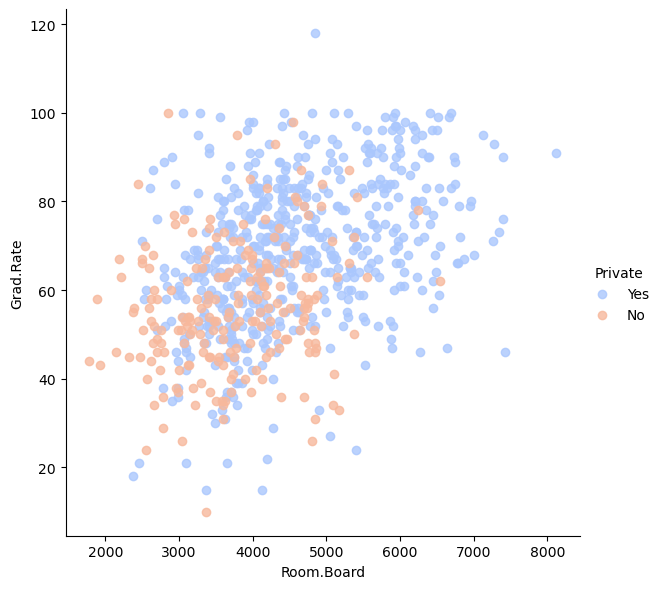

In [18]:
sns.lmplot(x='Room.Board',y='Grad.Rate',data=df,hue='Private',fit_reg=False,
           palette='coolwarm',height=6,aspect=1)

<span style="font-family: 'Times New Roman'; font-size: 18px;">

Here we create a scatter diagram that compares the Total count of full-time undergraduate students to Tuition fees for students from outside the state, using colors to represent the Private variable.
</span>


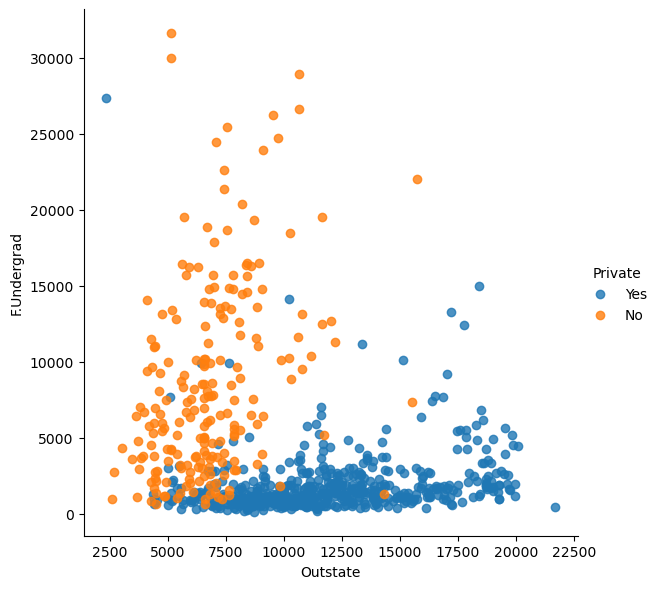

In [73]:
sns.lmplot(x='Outstate',y='F.Undergrad',data=df,hue='Private',fit_reg=False,
           height=6,aspect=1)

<span style="font-family: 'Times New Roman'; font-size: 18px;">

Now we make a stacked histogram that represents Out of State Tuition in relation to the Private variable. sns.FacetGrid has been used for this task. 

</span>



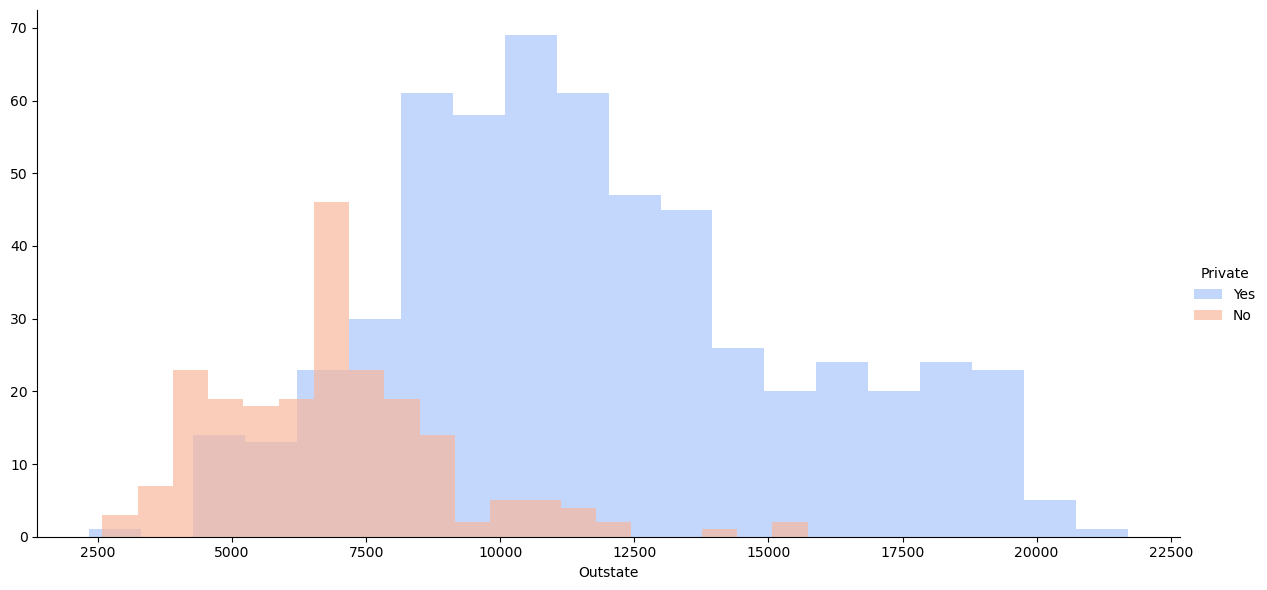

In [121]:
g = sns.FacetGrid(df,hue='Private',palette='coolwarm', height=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)
g = g.add_legend(title='Private')

<span style="font-family: 'Times New Roman'; font-size: 18px;">

In this instance, we create a similar histogram, but we utilize the Graduation rate instead. 
Oddly enough, we observe a private educational institution boasting a graduation rate exceeding 100 percent. We're curious about the name of that educational institution.
</span>


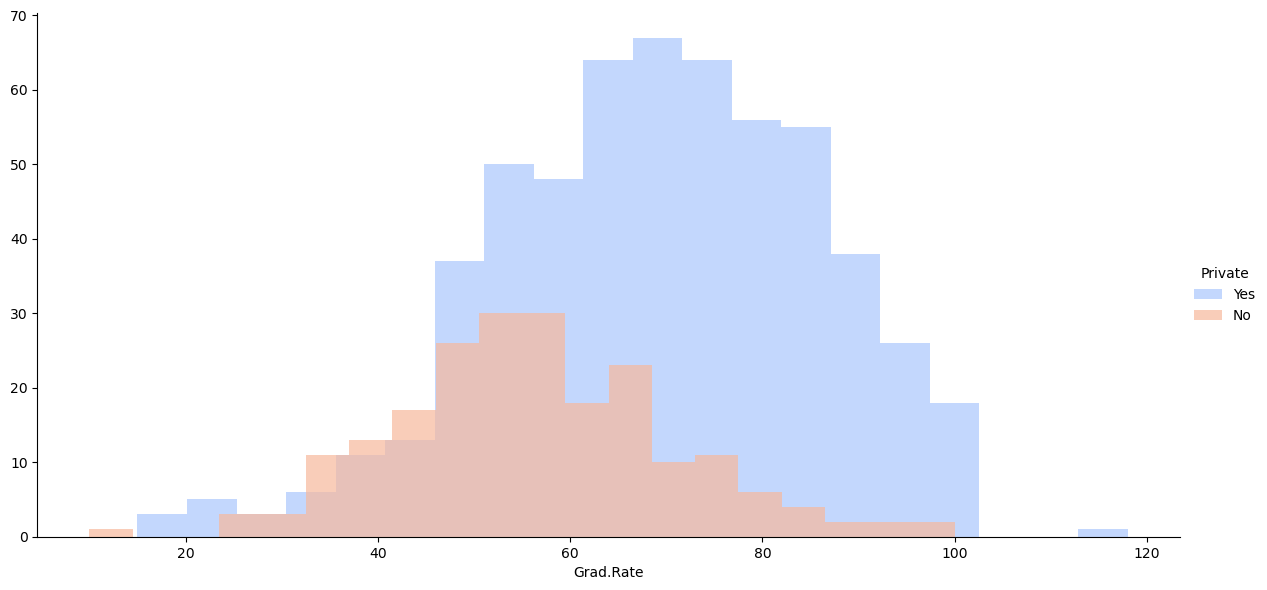

In [75]:
g = sns.FacetGrid(df,hue='Private',palette='coolwarm', height=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)
g = g.add_legend(title='Private')

<span style="font-family: 'Times New Roman'; font-size: 18px;">

To locate the school, we adjusted the graduation rate to exceed 100, and then we 
assigned a value of 100 to the name of that institution, which is Cazenovia, for clarity. 
</span>


In [76]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [77]:
df['Grad.Rate']['Cazenovia College'] = 100

C:\Users\rojin\AppData\Local\Temp\ipykernel_19664\2087630962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College'] = 100


In [78]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


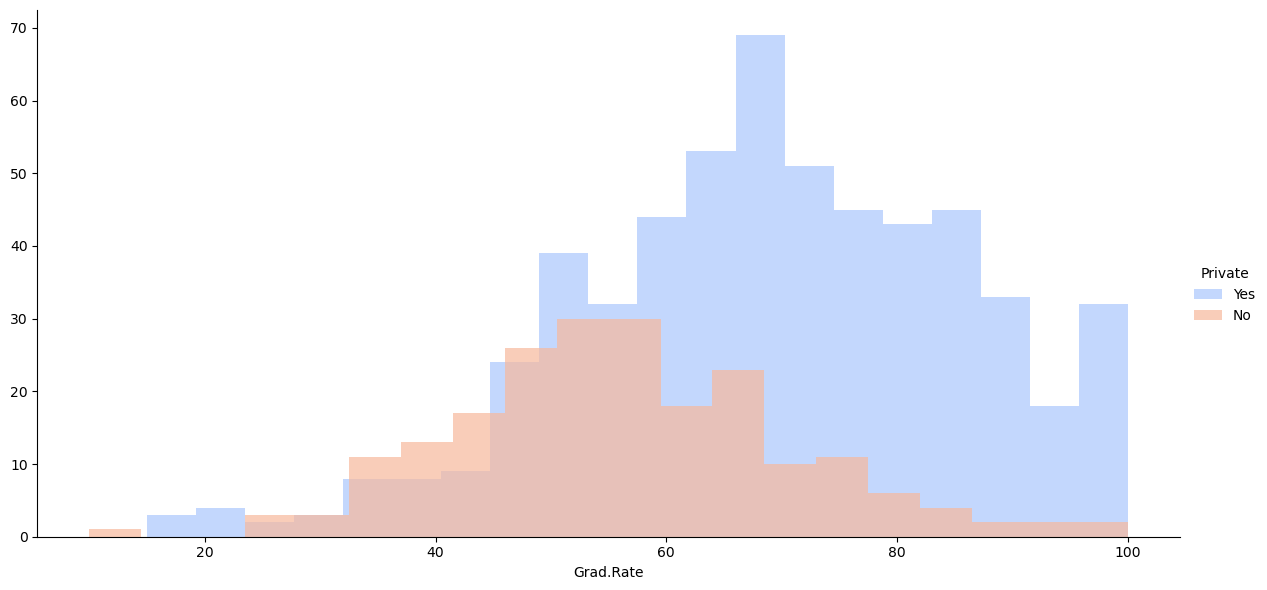

In [79]:
g = sns.FacetGrid(df,hue='Private',palette='coolwarm', height=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)
g = g.add_legend(title='Private')

<span style="font-family: 'Times New Roman'; font-size: 18px;">
The histogram presented here is entirely reasonable, and the graduation rate remains capped at 100 percent. 
 
</span>

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
# K Means Cluster Creation

We are now ready to formulate the labels for the clusters. This is accomplished through the importation of KMeans from the SciKit Learn.
 
</span>

In [116]:
from sklearn.cluster import KMeans

<span style="font-family: 'Times New Roman'; font-size: 18px;">
An instance of KMeans is instantiated, setting the number of clusters to two. 
    
</span>

In [117]:
kmeans = KMeans(n_clusters=2,random_state=3)

<span style="font-family: 'Times New Roman'; font-size: 18px;">

During the process of applying the KMeans clustering algorithm, we exclude the Private column since it holds the information that specifies if a university is classified as private or public. KMeans operates as an algorithm for unsupervised learning, indicating that it does not rely on labeled datasets during its training process. Rather than relying on predefined categories, it seeks to identify trends and clusters in the data using only the given characteristics.

Incorporating the Private column into the training dataset would bring the labels into the clustering algorithm, which goes against the fundamental principle of KMeans being unsupervised. Eliminating the Private column allows the algorithm to group universities according to various attributes (such as Grad.Rate, Apps, Accept, etc.) free from the impact of the labels.

Once the clustering process is complete, we can assess the effectiveness of the clustering algorithm by contrasting the clusters with the Private labels, ensuring that these labels are excluded from the training dataset.
</span>

In [115]:
kmeans.fit(df.drop('Private', axis=1))

C:\Users\rojin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rojin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=2, random_state=3)

<span style="font-family: 'Times New Roman'; font-size: 18px;">

Our goal here is to observe the centeroid of every cluster. 
</span>

In [104]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01, 3.14814815e-01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01, 7.93721973e-01]])

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
# Evaluation 
To assess our cluster, we require labels; however, in practical situations, labels are often unavailable. Fortunately, since this is merely an exercise, we do have labels here, so we can assess our model.
<br> A new column named "cluster" is established, where the values signify 1 for private schools and 0 for public institutions. 
<br>The main reason for writing the following code is to transform categorical data into a numerical format, which is a common preprocessing step in machine learning. By transforming the data, we can utilize algorithms that depend on numerical inputs, which simplifies the evaluation of how well our clustering model performs.
</span>

In [105]:
def converter(private):
    if private == 'Yes':
        return 1
    else:
        return 0

df['Cluster'] = df['Private'].apply(converter)


<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
Upon examining the head of our dataframe, we will notice the inclusion of a new column named 'cluster.' A comparison with the 'private' column reveals that when 'private' is marked as yes, the 'cluster' value is 1, whereas it is 0 when 'private' is no. 
</span>

In [120]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
We aim to generate a confusion matrix along with a classification report to assess how well the Kmeans clustering technique performs in the absence of labels.</span>

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

In [107]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print('\n')
print(classification_report(df['Cluster'],kmeans.labels_))


[[ 74 138]
 [ 34 531]]


              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



<span style="font-family: 'Times New Roman'; font-size: 18px;">

## Conclusion

Analyzing the confusion matrix and classification report reveals that the approach solely relies on the features to categorize universities into two separate groups private and public, which is quite remarkable. 
The classification report indicates that Class 1 or private colleges shows a much stronger performance than Class 0 or public colleges when it comes to both recall and F1-score.
This model shows a stronger ability to correctly classify instances of Class 1, but it encounters more difficulties with Class 0.
While the model achieves a reasonable accuracy of 78%, the poor recall for public colleges indicates that the model might be missing a significant number of actual Class 0 instances.

In summary, we recognize the significance of K Means in organizing unlabeled data into clusters!


</span>